### Otsu’s Binarization
- trial and error method
- bimodal image is an image whose histogram has two peaks
- image, we can approximately take a value in the middle of those peaks as threshold value, right ? 
- That is what Otsu binarization does. So in simple words, it automatically calculates a threshold value from image histogram for a bimodal image.
- images which are not bimodal, binarization won’t be accurate
- cv2.threshold() function is used, but pass an extra flag, cv2.THRESH_OTSU. For threshold value, simply pass zero. Then the algorithm finds the optimal threshold value and returns you as the second output, retVal. If Otsu thresholding is not used, retVal is same as the threshold value you used.

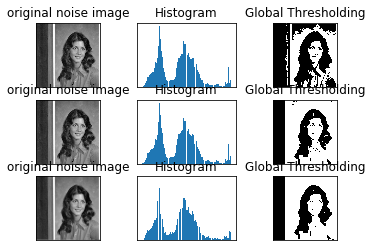

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread('standard_test_images\\standard_test_images\\1.tiff',0)

#global thresholding
ret1,binary=cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# ostu's thresholding
ret2,ostu=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# ostu's thresholding after Gaussina filter
blur=cv2.GaussianBlur(img,(5,5),0)
ret,ostus=cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images=[img,0,binary,img,0,ostu,blur,0,ostus]
titles=['original noise image','Histogram','Global Thresholding',
        'original noise image','Histogram','Global Thresholding',
        'original noise image','Histogram','Global Thresholding']
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]),plt.xticks([]),plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]),plt.xticks([]),plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]),plt.xticks([]),plt.yticks([])
plt.show()